In [3]:
!wget https://www.shanelynn.ie/wp-content/uploads/2015/06/phone_data.csv

--2023-01-31 22:25:08--  https://www.shanelynn.ie/wp-content/uploads/2015/06/phone_data.csv
www.shanelynn.ie (www.shanelynn.ie) 해석 중... 104.236.88.249
다음으로 연결 중: www.shanelynn.ie (www.shanelynn.ie)|104.236.88.249|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 200 OK
길이: 40576 (40K) [application/octet-stream]
저장 위치: `phone_data.csv.2'

phone_data.csv.2    100%[===================>]  39.62K  --.-KB/s    /  0.003s  

2023-01-31 22:25:09 (13.0 MB/s) - `phone_data.csv.2' 저장함 [40576/40576]



In [6]:
import pandas as pd
df_phone = pd.read_csv("./data/phone_data.csv")
df_phone.head()

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile


In [10]:
# date의 type이 object로 되어있음 - String으로 되어있다는 의미이므로 date 형식으로 바꿔주는 것이 좋음
df_phone.dtypes

index             int64
date             object
duration        float64
item             object
month            object
network          object
network_type     object
dtype: object

In [12]:
# 날짜 형식으로 변환시키기
import dateutil

df_phone["date"] = df_phone["date"].apply(
                            dateutil.parser.parse, dayfirst=True)

df_phone.dtypes

index                    int64
date            datetime64[ns]
duration               float64
item                    object
month                   object
network                 object
network_type            object
dtype: object

In [13]:
df_phone

,index,date,duration,item,month,network,network_type
0,0,2014-10-15 06:58:00,34.429,data,2014-11,data,data
1,1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile
2,2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile
3,3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile
4,4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile
...,...,...,...,...,...,...,...
825,825,2015-03-13 00:38:00,1.000,sms,2015-03,world,world
826,826,2015-03-13 00:39:00,1.000,sms,2015-03,Vodafone,mobile
827,827,2015-03-13 06:58:00,34.429,data,2015-03,data,data
828,828,2015-03-14 00:13:00,1.000,sms,2015-03,world,world


In [15]:
# 각 달별로 통화시간의 합
df_phone.groupby("month")["duration"].sum()

month
2014-11    26639.441
2014-12    14641.870
2015-01    18223.299
2015-02    15522.299
2015-03    22750.441
Name: duration, dtype: float64

In [17]:
# 각 달별로 통화시간의 평균
df_phone.groupby("month")["duration"].mean()

month
2014-11    115.823657
2014-12     93.260318
2015-01     88.894141
2015-02    113.301453
2015-03    225.251891
Name: duration, dtype: float64

In [3]:
import pandas as pd
df_phone = pd.read_csv("./data/phone_data.csv")
df_phone.head()

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile


In [5]:
!conda install --y matplotlib

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/kwon-yong-geun/miniconda3/envs/ml

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotli-1.0.9               |       hca72f7f_7          19 KB
    brotli-bin-1.0.9           |       hca72f7f_7          17 KB
    contourpy-1.0.5            |   py38haf03e11_0         191 KB
    cycler-0.11.0              |     pyhd3eb1b0_0          12 KB
    fonttools-4.25.0           |     pyhd3eb1b0_0         632 KB
    freetype-2.12.1            |       hd8bbffd_0         592 KB
    giflib-5.2.1               |       h6c40b1e_1          76 KB
    jpeg-9e                    |       hca72f7f_0         225

<AxesSubplot: xlabel='month'>

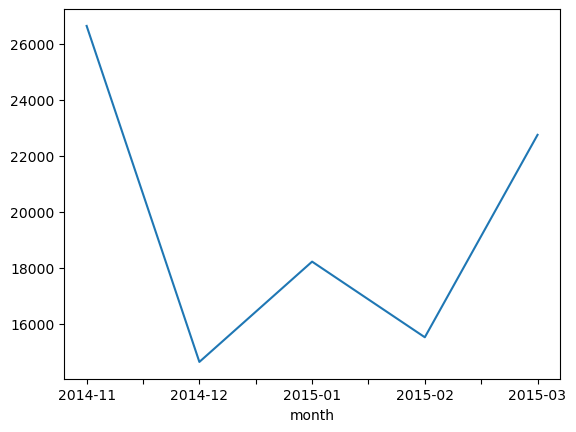

In [7]:
# 월별로 통화량이 어떻게 변했는지 시각화 가능
df_phone.groupby("month")["duration"].sum().plot()

In [12]:
df_phone

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile
...,...,...,...,...,...,...,...
825,825,13/03/15 00:38,1.000,sms,2015-03,world,world
826,826,13/03/15 00:39,1.000,sms,2015-03,Vodafone,mobile
827,827,13/03/15 06:58,34.429,data,2015-03,data,data
828,828,14/03/15 00:13,1.000,sms,2015-03,world,world


<AxesSubplot: xlabel='month'>

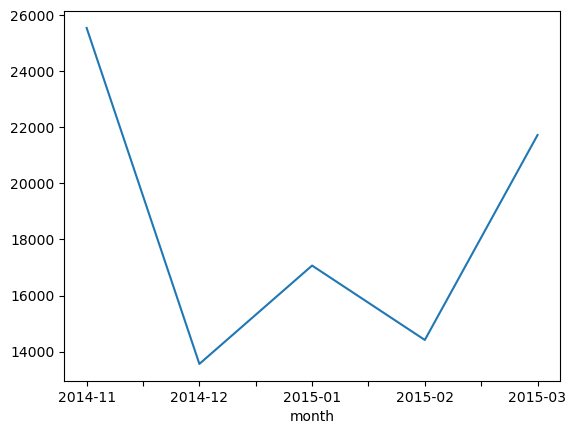

In [8]:
df_phone[df_phone["item"] == "call"].groupby("month")["duration"].sum().plot()

In [23]:
# 월별로 아이템들의 통화량의 숫자
df_phone.groupby(["month", "item"])["duration"].count().unstack()

item,call,data,sms
month,,,
2014-11,107,29,94
2014-12,79,30,48
2015-01,88,31,86
2015-02,67,31,39
2015-03,47,29,25


<AxesSubplot: xlabel='month'>

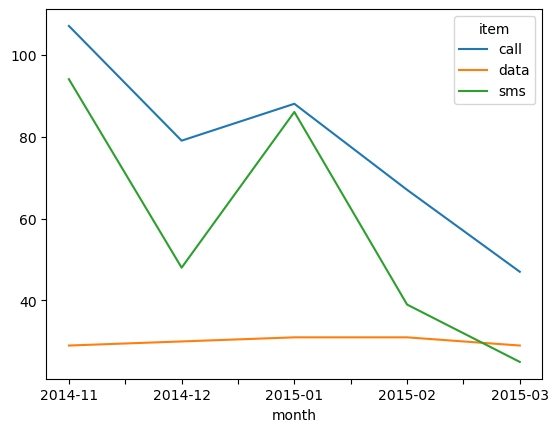

In [21]:
df_phone.groupby(["month", "item"])["duration"].count().unstack().plot()

In [25]:
# month를 index로 하지 않고 그냥 column으로 뽑음
df_phone.groupby("month", as_index = False).agg({"duration": "sum"})

,month,duration
0,2014-11,26639.441
1,2014-12,14641.870
2,2015-01,18223.299
3,2015-02,15522.299
4,2015-03,22750.441


In [26]:
df_phone.groupby(["month", "item"]).agg(
{
    "duration": sum, # find the sum of the durations for each group
    "network_type": "count", # find the number of network type entries
    "date": "first" # get the first date per group
})

duration  network_type            date
month   item                                         
2014-11 call  25547.000           107  15/10/14 06:58
        data    998.441            29  15/10/14 06:58
        sms      94.000            94  16/10/14 22:18
2014-12 call  13561.000            79  14/11/14 17:24
        data   1032.870            30  13/11/14 06:58
        sms      48.000            48  14/11/14 17:28
2015-01 call  17070.000            88  15/12/14 20:03
        data   1067.299            31  13/12/14 06:58
        sms      86.000            86  15/12/14 19:56
2015-02 call  14416.000            67  15/01/15 10:36
        data   1067.299            31  13/01/15 06:58
        sms      39.000            39  15/01/15 12:23
2015-03 call  21727.000            47  12/02/15 20:15
        data    998.441            29  13/02/15 06:58
        sms      25.000            25  19/02/15 18:46

### Data

In [29]:
# nunique는 고유값들의 수를 알려줌
df_phone.groupby(['month', 'item']).agg({'duration': [min, max, sum],
                                        'network_type': "count",
                                        'date': [min, 'first', 'nunique']})

duration                       network_type            date  \
                  min        max        sum        count             min   
month   item                                                               
2014-11 call    1.000   1940.000  25547.000          107  01/11/14 15:13   
        data   34.429     34.429    998.441           29  01/11/14 06:58   
        sms     1.000      1.000     94.000           94  03/11/14 08:40   
2014-12 call    2.000   2120.000  13561.000           79  02/12/14 11:40   
        data   34.429     34.429   1032.870           30  01/12/14 06:58   
        sms     1.000      1.000     48.000           48  01/12/14 12:51   
2015-01 call    2.000   1859.000  17070.000           88  02/01/15 11:27   
        data   34.429     34.429   1067.299           31  01/01/15 06:58   
        sms     1.000      1.000     86.000           86  02/01/15 23:26   
2015-02 call    1.000   1863.000  14416.000           67  01/02/15 13:33   
        data   34.429     34.429   1067.299           31  01/02/15 06:58   
        sms     1.000      1.000     39.000           39  02/02/15 17:35   
2015-03 call    2.000  10528.000  21727.000           47  01/03/15 12:19   
        data   34.429     34.429    998.441           29  01/03/15 06:58   
        sms     1.000      1.000     25.000           25  02/03/15 09:19   

                                      
                       first nunique  
month   item                          
2014-11 call  15/10/14 06:58     104  
        data  15/10/14 06:58      29  
        sms   16/10/14 22:18      79  
2014-12 call  14/11/14 17:24      76  
        data  13/11/14 06:58      30  
        sms   14/11/14 17:28      41  
2015-01 call  15/12/14 20:03      84  
        data  13/12/14 06:58      31  
        sms   15/12/14 19:56      58  
2015-02 call  15/01/15 10:36      67  
        data  13/01/15 06:58      31  
        sms   15/01/15 12:23      27  
2015-03 call  12/02/15 20:15      47  
        data  13/02/15 06:58      29  
        sms   19/02/15 18:46      17

In [31]:
import numpy as np
grouped = df_phone.groupby('month').agg({"duration": [min, max, np.mean]})

grouped.columns = grouped.columns.droplevel(level = 0)
grouped.rename(columns={"min": "min_duration", "max": "max_duration", "mean": "mean_duration"})

,min_duration,max_duration,mean_duration
month,,,
2014-11,1.0,1940.0,115.823657
2014-12,1.0,2120.0,93.260318
2015-01,1.0,1859.0,88.894141
2015-02,1.0,1863.0,113.301453
2015-03,1.0,10528.0,225.251891


In [34]:
grouped

,min,max,mean
month,,,
2014-11,1.0,1940.0,115.823657
2014-12,1.0,2120.0,93.260318
2015-01,1.0,1859.0,88.894141
2015-02,1.0,1863.0,113.301453
2015-03,1.0,10528.0,225.251891


In [37]:
# prefix 를 활용해서 앞에 duration 붙히기
grouped.add_prefix("duration_")

,duration_min,duration_max,duration_mean
month,,,
2014-11,1.0,1940.0,115.823657
2014-12,1.0,2120.0,93.260318
2015-01,1.0,1859.0,88.894141
2015-02,1.0,1863.0,113.301453
2015-03,1.0,10528.0,225.251891


### Pivot Table & Cross Tab

### Pivot Table

- excel에서 보던 것
- Index 축은 groupby와 동일함
- Column에 추가로 labeling 값을 추가하여, Value에 numberic type 값을 aggregation 하는 형태

In [39]:
import dateutil

df_phone = pd.read_csv("./data/phone_data.csv")
df_phone['date'] = df_phone['date'].apply(dateutil.parser.parse, dayfirst=True)
df_phone.head()

,index,date,duration,item,month,network,network_type
0,0,2014-10-15 06:58:00,34.429,data,2014-11,data,data
1,1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile
2,2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile
3,3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile
4,4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile


In [42]:
df_phone.pivot_table(["duration"], # 값(value)가 들어가는 부분
                    index = [df_phone.month, df_phone.item], # index의 이름 지정해주기
                    columns = df_phone.network, aggfunc = "sum", fill_value = 0) # column 지정하기, aggregation 함수 지정

duration                                                   \
network        Meteor Tesco  Three Vodafone      data landline special   
month   item                                                             
2014-11 call     1521  4045  12458     4316     0.000     2906       0   
        data        0     0      0        0   998.441        0       0   
        sms        10     3     25       55     0.000        0       1   
2014-12 call     2010  1819   6316     1302     0.000     1424       0   
        data        0     0      0        0  1032.870        0       0   
        sms        12     1     13       18     0.000        0       0   
2015-01 call     2207  2904   6445     3626     0.000     1603       0   
        data        0     0      0        0  1067.299        0       0   
        sms        10     3     33       40     0.000        0       0   
2015-02 call     1188  4087   6279     1864     0.000      730       0   
        data        0     0      0        0  1067.299        0       0   
        sms         1     2     11       23     0.000        0       2   
2015-03 call      274   973   4966     3513     0.000    11770       0   
        data        0     0      0        0   998.441        0       0   
        sms         0     4      5       13     0.000        0       0   

                              
network      voicemail world  
month   item                  
2014-11 call       301     0  
        data         0     0  
        sms          0     0  
2014-12 call       690     0  
        data         0     0  
        sms          0     4  
2015-01 call       285     0  
        data         0     0  
        sms          0     0  
2015-02 call       268     0  
        data         0     0  
        sms          0     0  
2015-03 call       231     0  
        data         0     0  
        sms          0     3

In [43]:
df_phone.head()

,index,date,duration,item,month,network,network_type
0,0,2014-10-15 06:58:00,34.429,data,2014-11,data,data
1,1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile
2,2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile
3,3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile
4,4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile


In [44]:
df_phone.pivot_table(["duration"], # 값(value)가 들어가는 부분
                    index = [df_phone.month, df_phone.item], # index의 이름 지정해주기
                    columns = df_phone.network, # column 지정하기
                    aggfunc = "sum", # aggregation 함수 지정
                    fill_value = 0) , # NaN 값을 0으로 출력

(             duration                                                   \
 network        Meteor Tesco  Three Vodafone      data landline special   
 month   item                                                             
 2014-11 call     1521  4045  12458     4316     0.000     2906       0   
         data        0     0      0        0   998.441        0       0   
         sms        10     3     25       55     0.000        0       1   
 2014-12 call     2010  1819   6316     1302     0.000     1424       0   
         data        0     0      0        0  1032.870        0       0   
         sms        12     1     13       18     0.000        0       0   
 2015-01 call     2207  2904   6445     3626     0.000     1603       0   
         data        0     0      0        0  1067.299        0       0   
         sms        10     3     33       40     0.000        0       0   
 2015-02 call     1188  4087   6279     1864     0.000      730       0   
         data        0   

In [48]:
# pivot_table 말고 group by 로도 표현 가능

df_phone.groupby(["month", "item", "network"])["duration"].sum().unstack()

network       Meteor   Tesco    Three  Vodafone      data  landline  special  \
month   item                                                                   
2014-11 call  1521.0  4045.0  12458.0    4316.0       NaN    2906.0      NaN   
        data     NaN     NaN      NaN       NaN   998.441       NaN      NaN   
        sms     10.0     3.0     25.0      55.0       NaN       NaN      1.0   
2014-12 call  2010.0  1819.0   6316.0    1302.0       NaN    1424.0      NaN   
        data     NaN     NaN      NaN       NaN  1032.870       NaN      NaN   
        sms     12.0     1.0     13.0      18.0       NaN       NaN      NaN   
2015-01 call  2207.0  2904.0   6445.0    3626.0       NaN    1603.0      NaN   
        data     NaN     NaN      NaN       NaN  1067.299       NaN      NaN   
        sms     10.0     3.0     33.0      40.0       NaN       NaN      NaN   
2015-02 call  1188.0  4087.0   6279.0    1864.0       NaN     730.0      NaN   
        data     NaN     NaN      NaN       NaN  1067.299       NaN      NaN   
        sms      1.0     2.0     11.0      23.0       NaN       NaN      2.0   
2015-03 call   274.0   973.0   4966.0    3513.0       NaN   11770.0      NaN   
        data     NaN     NaN      NaN       NaN   998.441       NaN      NaN   
        sms      NaN     4.0      5.0      13.0       NaN       NaN      NaN   

network       voicemail  world  
month   item                    
2014-11 call      301.0    NaN  
        data        NaN    NaN  
        sms         NaN    NaN  
2014-12 call      690.0    NaN  
        data        NaN    NaN  
        sms         NaN    4.0  
2015-01 call      285.0    NaN  
        data        NaN    NaN  
        sms         NaN    NaN  
2015-02 call      268.0    NaN  
        data        NaN    NaN  
        sms         NaN    NaN  
2015-03 call      231.0    NaN  
        data        NaN    NaN  
        sms         NaN    3.0

### Crosstab

- 특히 두 column 간의 교차 빈도, 비율, 덧셈 등을 구할 때 사용
- Pivot table의 특수한 형태
- User-Item Rating Matrix 등을 만들 때 사용가능함

In [52]:
df_movie = pd.read_csv("./data/movie_rating.csv")
df_movie.head()

,critic,title,rating
0,Jack Matthews,Lady in the Water,3.0
1,Jack Matthews,Snakes on a Plane,4.0
2,Jack Matthews,You Me and Dupree,3.5
3,Jack Matthews,Superman Returns,5.0
4,Jack Matthews,The Night Listener,3.0


In [53]:
# 아래와 같이 두 column 간의 관계를 나타낼 때 사용함
# 아래는 평론가와 영화 간의 관계를 나타낸 것
pd.crosstab(index = df_movie.critic, columns = df_movie.title, values = df_movie.rating,
           aggfunc = "first").fillna(0)

title,Just My Luck,Lady in the Water,Snakes on a Plane,Superman Returns,The Night Listener,You Me and Dupree
critic,,,,,,
Claudia Puig,3.0,0.0,3.5,4.0,4.5,2.5
Gene Seymour,1.5,3.0,3.5,5.0,3.0,3.5
Jack Matthews,0.0,3.0,4.0,5.0,3.0,3.5
Lisa Rose,3.0,2.5,3.5,3.5,3.0,2.5
Mick LaSalle,2.0,3.0,4.0,3.0,3.0,2.0
Toby,0.0,0.0,4.5,4.0,0.0,1.0


In [54]:
# pivot table로도 표현 가능

df_movie.pivot_table(
    values = ["rating"],
    index = df_movie.critic,
    columns = df_movie.title,
    aggfunc = "sum",
    fill_value = 0
)

rating                                      \
title         Just My Luck Lady in the Water Snakes on a Plane   
critic                                                           
Claudia Puig           3.0               0.0               3.5   
Gene Seymour           1.5               3.0               3.5   
Jack Matthews          0.0               3.0               4.0   
Lisa Rose              3.0               2.5               3.5   
Mick LaSalle           2.0               3.0               4.0   
Toby                   0.0               0.0               4.5   

                                                                     
title         Superman Returns The Night Listener You Me and Dupree  
critic                                                               
Claudia Puig               4.0                4.5               2.5  
Gene Seymour               5.0                3.0               3.5  
Jack Matthews              5.0                3.0               3.5  
Lisa Rose                  3.5                3.0               2.5  
Mick LaSalle               3.0                3.0               2.0  
Toby                       4.0                0.0               1.0

In [56]:
# group by 로도 표현 가능

df_movie.groupby(["critic", "title"]).agg({"rating": "first"}).unstack()

rating                                      \
title         Just My Luck Lady in the Water Snakes on a Plane   
critic                                                           
Claudia Puig           3.0               NaN               3.5   
Gene Seymour           1.5               3.0               3.5   
Jack Matthews          NaN               3.0               4.0   
Lisa Rose              3.0               2.5               3.5   
Mick LaSalle           2.0               3.0               4.0   
Toby                   NaN               NaN               4.5   

                                                                     
title         Superman Returns The Night Listener You Me and Dupree  
critic                                                               
Claudia Puig               4.0                4.5               2.5  
Gene Seymour               5.0                3.0               3.5  
Jack Matthews              5.0                3.0               3.5  
Lisa Rose                  3.5                3.0               2.5  
Mick LaSalle               3.0                3.0               2.0  
Toby                       4.0                NaN               1.0

### Merge & Concat